In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('Bengaluru_House_Data.csv')
data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
data.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [5]:
## selecting the required columns only

data = data[['location','size','total_sqft','bath','price']]
data.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [6]:
data.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [7]:
data['size'].isnull().sum()

16

In [8]:
# filling nan values
data['location'].fillna('Whitefield',inplace=True)

In [9]:
data['size'].fillna('2 BHK',inplace=True)

In [10]:
data['bath'].fillna(2.0,inplace=True)
data.bath.isnull().sum()

0

In [11]:
#creating the seprate column called bhk and storing only the numbers in them
data['bhk'] = data['size'].str.split(' ').str.get(0).astype(int)
data.head()

#df3['size'].apply(lambda x: int(x.split(' ')[0]))

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [12]:
# correcting the total_squarefeet column and handling bhk outliers
data[data['bhk'] > 20]   # these are the outliesrs

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [13]:
# for the data which is in range format

def mean(value):
    if '-' in value:
        a = value.str.split('-')
        total = a[0] + a[1]
    return total

In [14]:
data['total_sqft'] = data['total_sqft'].astype(str)

In [15]:
for i in data['total_sqft']:
    if '-' in str(i):
        a = i.split('-')
        total = (float(a[0]) + float(a[1]))/2
        indexes = data[data['total_sqft'] == i].index[0]
        data['total_sqft'].replace(data['total_sqft'][indexes],total,inplace=True)
        
        
# for i in data['total_sqft']:
#     if ' ' in str(i):
#         b = i.split(' ')
#         main = str(b[0])[0:-3]
#         ind = data[data['total_sqft'] == i].index[0]
# #         print(data[data['total_sqft'] == i].index[0])
#         data['total_sqft'].replace(data['total_sqft'][ind],main,inplace=True)


In [16]:
data.shape

(13320, 6)

In [17]:
l = []
for i in data['total_sqft']:
    try:
        float(i)
    except:
#         print(i)
        
        l.append(i)
print(l)

['34.46Sq. Meter', '4125Perch', '1000Sq. Meter', '1100Sq. Yards', '5.31Acres', '30Acres', '716Sq. Meter', '1500Sq. Meter', '142.61Sq. Meter', '1574Sq. Yards', '361.33Sq. Yards', '117Sq. Yards', '3040Sq. Meter', '500Sq. Yards', '167Sq. Meter', '315Sq. Yards', '3Cents', '188.89Sq. Yards', '204Sq. Meter', '45Sq. Yards', '133.3Sq. Yards', '78.03Sq. Meter', '122Sq. Yards', '84.53Sq. Meter', '2.09Acres', '24Guntha', '697Sq. Meter', '142.61Sq. Meter', '1500Cents', '132Sq. Yards', '2Acres', '1100Sq. Meter', '15Acres', '1.26Acres', '151.11Sq. Yards', '1Grounds', '2940Sq. Yards', '45.06Sq. Meter', '1.25Acres', '86.72Sq. Meter', '38Guntha', '6Acres', '120Sq. Yards', '24Sq. Meter', '142.84Sq. Meter', '300Sq. Yards']


In [18]:
data = data[~data['total_sqft'].isin(l)]

In [19]:
data['total_sqft'] = data['total_sqft'].astype(float)

In [20]:
data['total_sqft'].mean()

1559.6266939129125

In [21]:
l

['34.46Sq. Meter',
 '4125Perch',
 '1000Sq. Meter',
 '1100Sq. Yards',
 '5.31Acres',
 '30Acres',
 '716Sq. Meter',
 '1500Sq. Meter',
 '142.61Sq. Meter',
 '1574Sq. Yards',
 '361.33Sq. Yards',
 '117Sq. Yards',
 '3040Sq. Meter',
 '500Sq. Yards',
 '167Sq. Meter',
 '315Sq. Yards',
 '3Cents',
 '188.89Sq. Yards',
 '204Sq. Meter',
 '45Sq. Yards',
 '133.3Sq. Yards',
 '78.03Sq. Meter',
 '122Sq. Yards',
 '84.53Sq. Meter',
 '2.09Acres',
 '24Guntha',
 '697Sq. Meter',
 '142.61Sq. Meter',
 '1500Cents',
 '132Sq. Yards',
 '2Acres',
 '1100Sq. Meter',
 '15Acres',
 '1.26Acres',
 '151.11Sq. Yards',
 '1Grounds',
 '2940Sq. Yards',
 '45.06Sq. Meter',
 '1.25Acres',
 '86.72Sq. Meter',
 '38Guntha',
 '6Acres',
 '120Sq. Yards',
 '24Sq. Meter',
 '142.84Sq. Meter',
 '300Sq. Yards']

In [22]:
len(l)   # we will drop these rows

46

In [23]:
# dealing with the BHK outliers

data[(data['total_sqft'] > 7000) & (data['total_sqft'] < 8000)]['bhk'].median()

5.0

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13274 entries, 0 to 13319
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13274 non-null  object 
 1   size        13274 non-null  object 
 2   total_sqft  13274 non-null  float64
 3   bath        13274 non-null  float64
 4   price       13274 non-null  float64
 5   bhk         13274 non-null  int32  
dtypes: float64(3), int32(1), object(2)
memory usage: 674.1+ KB


In [25]:
data = data.drop(columns=['size'])
data.head()

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056.0,2.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,120.00,4
2,Uttarahalli,1440.0,2.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,95.00,3
4,Kothanur,1200.0,2.0,51.00,2


In [26]:
# the given prices are given in laks so lets conver them to their original numbers
data['price_per_sqft'] = (data['price']*100000) / data['total_sqft']
data

,location,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,51.00,2,4250.000000
...,...,...,...,...,...,...
13315,Whitefield,3453.0,4.0,231.00,5,6689.834926
13316,Richards Town,3600.0,5.0,400.00,4,11111.111111
13317,Raja Rajeshwari Nagar,1141.0,2.0,60.00,2,5258.545136
13318,Padmanabhanagar,4689.0,4.0,488.00,4,10407.336319


In [27]:
data.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13274.000000,13274.000000,13274.000000,13274.000000,1.327400e+04
mean,1559.626694,2.687359,112.453654,2.801718,7.907501e+03
std,1238.405258,1.336158,149.070368,1.291591,1.064296e+05
min,1.000000,1.000000,8.000000,1.000000,2.678298e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.266865e+03
50%,1276.000000,2.000000,72.000000,3.000000,5.434306e+03
75%,1680.000000,3.000000,120.000000,3.000000,7.311746e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


C:\Users\surve\AppData\Local\Temp\ipykernel_9024\2309002448.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['price'])


<Axes: xlabel='price', ylabel='Density'>

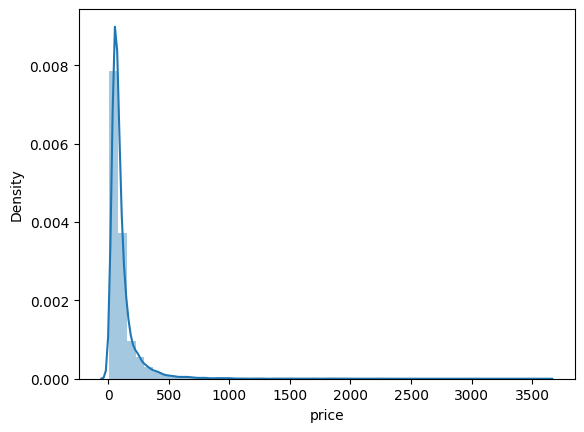

In [28]:
sns.distplot(data['price'])

In [29]:
l[3] = '    3 cents'

In [30]:
l[3].strip()

'3 cents'

In [31]:
# stripping the location values

data['location'] = data['location'].apply(lambda x:x.strip())

In [32]:
# Locations
data.location.value_counts()    # here total 1300 different locations are available
                                # so we will replace those locations which are appearing less than 10 
                                # with the others

location
Whitefield                        540
Sarjapur  Road                    399
Electronic City                   304
Kanakpura Road                    271
Thanisandra                       236
                                 ... 
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
Kannur                              1
singapura paradise                  1
Abshot Layout                       1
Name: count, Length: 1288, dtype: int64

In [33]:
(data.location.value_counts().values < 10).sum()  # total 1047 values will be reolaces by "others"

1034

In [34]:
a = list(data['location'].value_counts()[data['location'].value_counts() <= 10 ].index)
a

data['location'].replace(a,'Others',inplace=True)

In [35]:
data['location'].value_counts()

location
Others             2876
Whitefield          540
Sarjapur  Road      399
Electronic City     304
Kanakpura Road      271
                   ... 
Doddaballapur        11
Tindlu               11
Marsur               11
HAL 2nd Stage        11
Kodigehalli          11
Name: count, Length: 241, dtype: int64

### Outlier Detection and Removal


In [36]:
data

,location,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,51.00,2,4250.000000
...,...,...,...,...,...,...
13315,Whitefield,3453.0,4.0,231.00,5,6689.834926
13316,Others,3600.0,5.0,400.00,4,11111.111111
13317,Raja Rajeshwari Nagar,1141.0,2.0,60.00,2,5258.545136
13318,Padmanabhanagar,4689.0,4.0,488.00,4,10407.336319


C:\Users\surve\AppData\Local\Temp\ipykernel_9024\1883936364.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['total_sqft'])


<Axes: xlabel='total_sqft', ylabel='Density'>

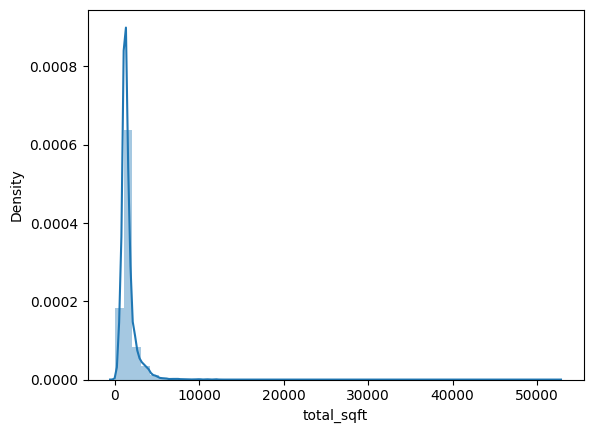

In [37]:
sns.distplot(data['total_sqft'])

##### AS A DATA SCIENTIST S A DATA SCIENTIST WHEN YOU HAVE A CONVERSATION WITH YOUR BUSINESS MANAGER (WHO HAS EXPERTISE IN REAL ESTATE), HE WILL TELL YOU THAT NORMALLY SQUARE FT PER BEDROOM IS 300 (I.E. 2 BHK APARTMENT IS MINIMUM 600 SQFT. IF YOU HAVE FOR EXAMPLE 400 SQFT APARTMENT WITH 2 BHK THAN THAT SEEMS SUSPICIOUS AND CAN BE REMOVED AS AN OUTLIER. WE WILL REMOVE SUCH OUTLIERS BY KEEPING OUR MINIMUM THRESOLD PER BHK TO BE 300 SQFT

In [38]:
# data.head(10)
data[data.total_sqft/data.bhk<300]
print(data.shape)
data = data[~(data.total_sqft/data.bhk<300)]
print(data.shape)

(13274, 6)
(12530, 6)


In [39]:
data.shape

(12530, 6)

In [40]:
data.head(10)

,location,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,1310.0,3.0,63.25,3,4828.244275
10,Whitefield,1800.0,2.0,70.00,3,3888.888889


In [41]:
# HERE WE FIND THAT MIN PRICE PER SQFT IS 267 RS/SQFT WHEREAS MAX IS
# 12000000, THIS SHOWS A WIDE VARIATION IN PROPERTY PRICES. WE 
# SHOULD REMOVE OUTLIERS PER LOCATION USING MEAN AND ONE STANDARD DEVIATION

def rem_outlier_sqft(df):
    df_output = pd.DataFrame()
    for i,j in df.groupby('location'):
        m = j['price_per_sqft'].mean()
        std = np.std(j['price_per_sqft'])
        a = j[(j['price_per_sqft'] > (m-std)) & (j['price_per_sqft'] < (m+std))]
        df_output = pd.concat([df_output,a],ignore_index=True)
    return df_output
rem_outlier_sqft(data)

,location,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,2850.0,4.0,428.00,4,15017.543860
1,1st Block Jayanagar,1630.0,3.0,194.00,3,11901.840491
2,1st Block Jayanagar,1875.0,2.0,235.00,3,12533.333333
3,1st Block Jayanagar,1200.0,2.0,130.00,3,10833.333333
4,1st Block Jayanagar,1235.0,2.0,148.00,2,11983.805668
...,...,...,...,...,...,...
10297,Yeshwanthpur,1676.0,3.0,92.13,3,5497.016706
10298,Yeshwanthpur,2503.0,3.0,138.00,3,5513.383939
10299,Yeshwanthpur,1855.0,3.0,135.00,3,7277.628032
10300,Yeshwanthpur,1876.0,3.0,160.00,3,8528.784648


In [42]:
# now our main data is the data with no outliers 
data = rem_outlier_sqft(data)

In [43]:
data.shape

(10302, 6)

In [44]:
data['location'].value_counts()

location
Others                  2310
Whitefield               485
Sarjapur  Road           305
Electronic City          279
Kanakpura Road           196
                        ... 
Banjara Layout             4
Vishveshwarya Layout       4
Vishwapriya Layout         4
HAL 2nd Stage              4
Marsur                     3
Name: count, Length: 241, dtype: int64

In [45]:
data.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,10302.000000,10302.000000,10302.000000,10302.000000,10302.000000
mean,1508.585392,2.472044,91.294983,2.575325,5659.095970
std,880.774066,0.980018,86.343018,0.898664,2265.667258
min,300.000000,1.000000,10.000000,1.000000,1250.000000
25%,1110.000000,2.000000,49.000000,2.000000,4244.994224
50%,1286.000000,2.000000,67.000000,2.000000,5175.792088
75%,1650.000000,3.000000,100.000000,3.000000,6428.571429
max,30400.000000,16.000000,2200.000000,16.000000,24509.803922


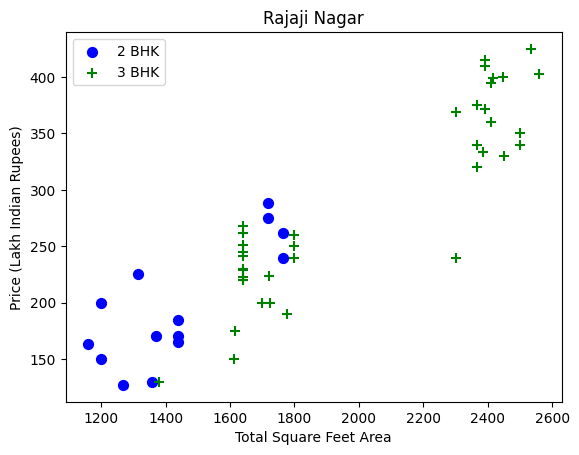

In [46]:
#LET'S CHECK IF FOR A GIVEN LOCATION HOW DOES THE 2 BHK AND 3 BHK PROPERTY PRICES LOOK LIKE
def area_price_per_location(data,location):
    bhk2 = data[(data['location'] == location) & (data['bhk'] == 2)]
    bhk3 = data[(data['location'] == location) & (data['bhk'] == 3) ]
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()

    
area_price_per_location(data,'Rajaji Nagar')

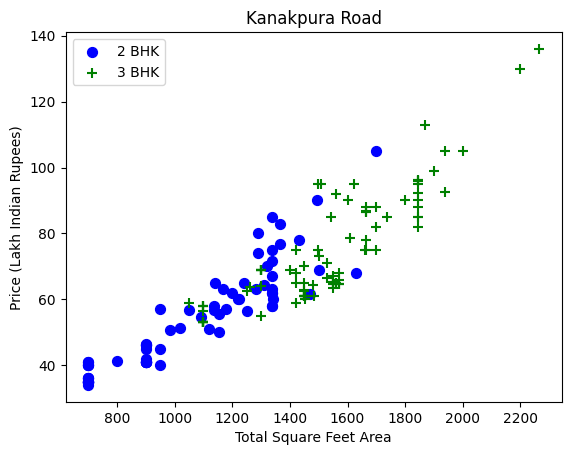

In [47]:
area_price_per_location(data,'Kanakpura Road')

In [48]:
# now we will also remove those apartments where the price of 2 bhk is less than the price of 1 bhk and so on
# firstly we will crate the dictionary which contains the stats of all locations

def bhk_cleaner(df):
    exclude_indices = np.array([])
    for loc,locdf in data.groupby('location'):
        bhk_stats = {}
        for bhk,bhkdf in locdf.groupby('bhk'):
            bhk_stats[bhk] = {'mean' : bhkdf['price_per_sqft'].mean(),
            'std' : np.std(bhkdf['price_per_sqft']),
            'count' : bhkdf['price_per_sqft'].shape[0]}

        for bhk,bhkdf in locdf.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhkdf[bhkdf.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
data = bhk_cleaner(data)

In [49]:
data

,location,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,2850.0,4.0,428.0,4,15017.543860
1,1st Block Jayanagar,1630.0,3.0,194.0,3,11901.840491
2,1st Block Jayanagar,1875.0,2.0,235.0,3,12533.333333
3,1st Block Jayanagar,1200.0,2.0,130.0,3,10833.333333
4,1st Block Jayanagar,1235.0,2.0,148.0,2,11983.805668
...,...,...,...,...,...,...
10291,Yeshwanthpur,1195.0,2.0,100.0,2,8368.200837
10292,Yeshwanthpur,1692.0,3.0,108.0,3,6382.978723
10294,Yeshwanthpur,2500.0,5.0,185.0,6,7400.000000
10299,Yeshwanthpur,1855.0,3.0,135.0,3,7277.628032


NameError: name 'data1' is not defined

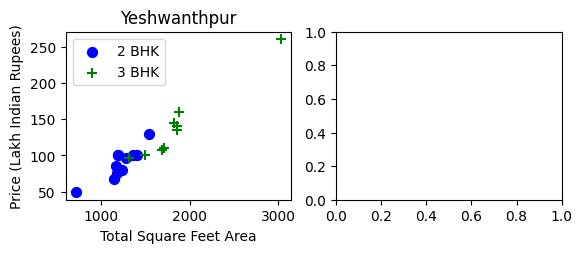

In [50]:
# now again seeing the previous graphs 

plt.subplot(2,2,1)
area_price_per_location(data,'Yeshwanthpur')

plt.subplot(2,2,2)
area_price_per_location(data1,'Yeshwanthpur')

In [ ]:
# def bhk_outlier_remover(df):
#     exclude_indices = np.array([])
#     for loc,dat in df.groupby('location'):
# #         print(dat)
#         bhk_stats = {}
#         for bhk, bhk_df in dat.groupby('bhk'):
# #             print(bhk_df)
#             bhk_stats[bhk] = {
#                 'mean': np.mean(bhk_df.price_per_sqft),
#                 'std': np.std(bhk_df.price_per_sqft),
#                 'count': bhk_df.shape[0]
#             }
    
#         for bhk,bhk_df in dat.groupby('bhk'):
#             stats = bhk_stats.get(bhk-1)
#             if stats and stats['count']>5:
#                 exclude_indices = np.append(exclude_indices,bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
#     return df.drop(exclude_indices,axis = 'index')
# bhk_outlier_remover(data)

### Outlier Removal Using Bathroom Feature

In [ ]:
# IT IS UNUSUAL TO HAVE 2 MORE BATHROOMS THAN NUMBER OF BEDROOMS IN A HOME


In [ ]:
data1 = data
data = data[data['bath'] < data['bhk']+2]

In [ ]:
data.drop(['price_per_sqft'],axis='columns',inplace=True)

In [ ]:
data

### One hot Encoding For Location

In [ ]:
df = pd.get_dummies(data.location,dtype='int')
df

In [ ]:
data = pd.concat([data,df],axis=1)

In [ ]:
data.columns

In [ ]:
data.drop('location',axis='columns',inplace=True)
data

In [ ]:
x = np.zeros(10)

In [ ]:
x[0]

### Building A Model

In [ ]:
X = data.drop(['price'],axis=1)
X

In [ ]:
y = data['price']
y

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)
lr.score(X_test,y_test)
# lr.predict(X_test)

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

lasso = Lasso()
lasso.fit(X_train,y_train)
print(lasso.score(X_test,y_test))


ridge = Ridge()
ridge.fit(X_train,y_train)
print(ridge.score(X_test,y_test))

In [ ]:
from sklearn.tree import DecisionTreeRegressor

dec_tree = DecisionTreeRegressor()
dec_tree.fit(X_train,y_train)
dec_tree.score(X_test,y_test)

In [ ]:
# linear regression works best

In [ ]:
def predict_price(location,sqft,bath,bhk):    
    loc_index = np.where(X.columns==location)[0]  #this takes index of the location
#     print(loc_index)
    x = np.zeros(len(X.columns))   # array of the same size is created
    x[0] = sqft
    x[1] = bath
    x[2] = bhk        # first values are replaced with the input values
#     print(x)
    if loc_index >= 0:  # here at the value of location is put as 1 because of 0 and 1 encoding
        x[loc_index] = 1

    return lr.predict([x])[0]

In [ ]:
predict_price('Indira Nagar',1200, 2, 2)

In [ ]:
predict_price('Indira Nagar',1200, 3, 3)

In [ ]:
import pickle

In [ ]:
with open('linear_model.pkl','wb') as f:
    pickle.dump(lr,f)